In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/berber/Desktop/MachineLearning/WA_Fn-UseC_-Telco-Customer-Churn.csv.xls')


df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# 1. Convert TotalCharges to numeric, turning errors (like spaces) into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Check how many missing values we just created
print(f"Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

# 3. Since it's only a few rows (usually 11), let's just drop them for now
df.dropna(inplace=True)

df.info()

Missing values in TotalCharges: 11
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBil

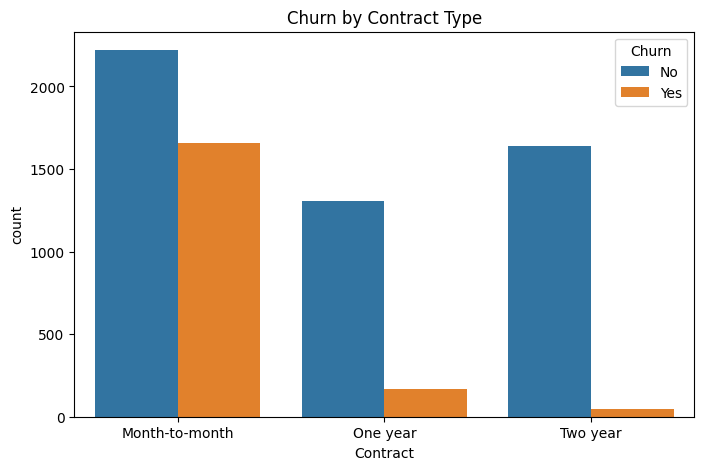

In [3]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.show()

In [4]:
# Convert 'Yes' to 1 and 'No' to 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Let's check the result
df['Churn'].head()


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

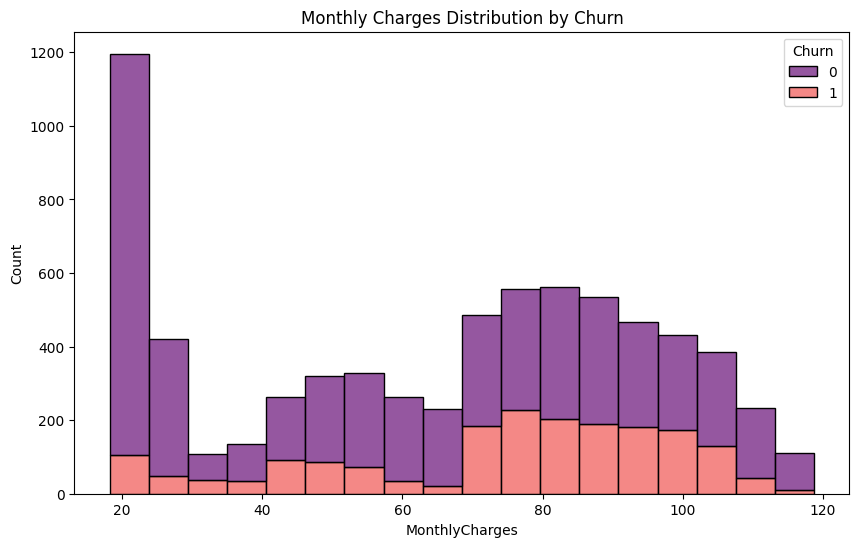

In [5]:
plt.figure(figsize=(10,6))
# element="step" grafiğin daha net okunmasını sağlar
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", multiple="stack", palette='magma')
plt.title('Monthly Charges Distribution by Churn')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# customerID gereksiz bir bilgi, onu siliyoruz.
# Churn tahmin edeceğimiz şey (y), diğer her şey tahmin etmek için kullanacağımız ipuçları (X).
y = df['Churn']
X = df.drop(['customerID', 'Churn'], axis=1)

# 2. Metinleri Sayıya Çevirme (One-Hot Encoding)
# Bilgisayar 'Month-to-month' yazısını anlamaz, bunu 0 ve 1'lere çeviririz.
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Veriyi Bölme (%80 Eğitim, %20 Test)
# Modeli X_train ile çalıştırıp, X_test ile sınava sokacağız.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 4. Modeli Kurma ve Eğitme
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Sınav Vakti: Tahmin Yapma ve Başarıyı Ölçme
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Modelin Doğruluk Oranı (Accuracy): % {accuracy * 100:.2f}")

Modelin Doğruluk Oranı (Accuracy): % 78.68


/Users/berber/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/var/folders/d2/81fnf2d908nbsv_zh_4krgqc0000gn/T/ipykernel_76670/2739936464.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_risk_factors, x='Importance', y='Feature', palette='Reds_r')


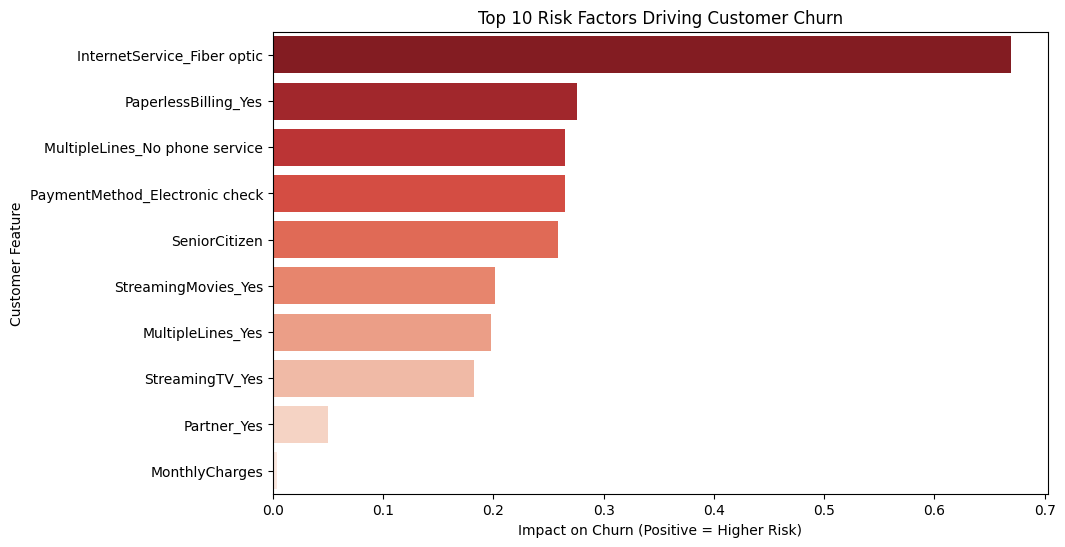

In [7]:
import numpy as np

# Modelin katsayılarını (hangi özelliğin ne kadar ağırlığı olduğunu) alalım
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.coef_[0]
})

# Önem derecesine göre büyükten küçüğe sıralayalım 
# (Pozitif değerler Churn'ü artıran risk faktörleridir)
top_risk_factors = feature_importance.sort_values(by='Importance', ascending=False).head(10)

# Bunu güzel bir BA sunum grafiğine çevirelim
plt.figure(figsize=(10, 6))
sns.barplot(data=top_risk_factors, x='Importance', y='Feature', palette='Reds_r')
plt.title('Top 10 Risk Factors Driving Customer Churn')
plt.xlabel('Impact on Churn (Positive = Higher Risk)')
plt.ylabel('Customer Feature')
plt.show()